In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import os
from imblearn.over_sampling import SMOTE


In [2]:
# Load in your data here
data = pd.read_csv("AEIaddictivehc_allPSD.csv") #file name here
print(data.shape[1])
print(data.shape[1])
print(data.iloc[:,117])

118
118
0      1
1      1
2      1
3      1
4      1
      ..
266    0
267    0
268    0
269    0
270    0
Name: Class, Length: 271, dtype: int64



Delta columns:
 ['age', 'education', 'IQ', 'AB.A.delta.a.FP1', 'AB.A.delta.b.FP2', 'AB.A.delta.c.F7', 'AB.A.delta.d.F3', 'AB.A.delta.e.Fz', 'AB.A.delta.f.F4', 'AB.A.delta.g.F8', 'AB.A.delta.h.T3', 'AB.A.delta.i.C3', 'AB.A.delta.j.Cz', 'AB.A.delta.k.C4', 'AB.A.delta.l.T4', 'AB.A.delta.m.T5', 'AB.A.delta.n.P3', 'AB.A.delta.o.Pz', 'AB.A.delta.p.P4', 'AB.A.delta.q.T6', 'AB.A.delta.r.O1', 'AB.A.delta.s.O2', 'Class']
SVM accuracy: 0.5714285714285714
SVM classification report:
               precision    recall  f1-score   support

           0       0.31      0.57      0.40         7
           1       0.80      0.57      0.67        21

    accuracy                           0.57        28
   macro avg       0.55      0.57      0.53        28
weighted avg       0.68      0.57      0.60        28

SVM AUC value: 0.5102040816326531

SVM accuracy for PCA: 0.5714285714285714
SVM classification report for PCA:
               precision    recall  f1-score   support

           0       0.35      

/home/novo/miniforge3/envs/smote/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[13]	validation_0-logloss:0.22446
[14]	validation_0-logloss:0.20012
[15]	validation_0-logloss:0.17339
[16]	validation_0-logloss:0.17038
[17]	validation_0-logloss:0.15686
[18]	validation_0-logloss:0.14213
[19]	validation_0-logloss:0.12838
[20]	validation_0-logloss:0.11889
[21]	validation_0-logloss:0.11101
[22]	validation_0-logloss:0.10165
[23]	validation_0-logloss:0.09612
[24]	validation_0-logloss:0.09095
[25]	validation_0-logloss:0.08593
[26]	validation_0-logloss:0.08282
[27]	validation_0-logloss:0.08026
[28]	validation_0-logloss:0.07609
[29]	validation_0-logloss:0.07098
[30]	validation_0-logloss:0.06803
[31]	validation_0-logloss:0.06544
[32]	validation_0-logloss:0.06346
[33]	validation_0-logloss:0.06108
[34]	validation_0-logloss:0.05902
[35]	validation_0-logloss:0.05743
[36]	validation_0-logloss:0.05614
[37]	validation_0-logloss:0.05559
[38]	validation_0-logloss:0.05360
[39]	validation_0-logloss:0.05234
[40]	validation_0-logloss:0.05045
[41]	validation_0-logloss:0.04958
[42]	validatio

/home/novo/miniforge3/envs/smote/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[22]	validation_0-logloss:0.15648
[23]	validation_0-logloss:0.15302
[24]	validation_0-logloss:0.14925
[25]	validation_0-logloss:0.14247
[26]	validation_0-logloss:0.13926
[27]	validation_0-logloss:0.13207
[28]	validation_0-logloss:0.12713
[29]	validation_0-logloss:0.12203
[30]	validation_0-logloss:0.11685
[31]	validation_0-logloss:0.11528
[32]	validation_0-logloss:0.11763
[33]	validation_0-logloss:0.11328
[34]	validation_0-logloss:0.11195
[35]	validation_0-logloss:0.10852
[36]	validation_0-logloss:0.10610
[37]	validation_0-logloss:0.10322
[38]	validation_0-logloss:0.10108
[39]	validation_0-logloss:0.09939
[40]	validation_0-logloss:0.09525
[41]	validation_0-logloss:0.09430
[42]	validation_0-logloss:0.09384
[43]	validation_0-logloss:0.09151
[44]	validation_0-logloss:0.08845
[45]	validation_0-logloss:0.08499
[46]	validation_0-logloss:0.08358
[47]	validation_0-logloss:0.07945
[48]	validation_0-logloss:0.07762
[49]	validation_0-logloss:0.07616
[50]	validation_0-logloss:0.07290
[51]	validatio

/home/novo/miniforge3/envs/smote/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[15]	validation_0-logloss:0.22765
[16]	validation_0-logloss:0.21489
[17]	validation_0-logloss:0.20809
[18]	validation_0-logloss:0.20229
[19]	validation_0-logloss:0.19152
[20]	validation_0-logloss:0.17971
[21]	validation_0-logloss:0.17614
[22]	validation_0-logloss:0.17563
[23]	validation_0-logloss:0.17651
[24]	validation_0-logloss:0.17265
[25]	validation_0-logloss:0.16157
[26]	validation_0-logloss:0.15310
[27]	validation_0-logloss:0.15186
[28]	validation_0-logloss:0.15024
[29]	validation_0-logloss:0.14400
[30]	validation_0-logloss:0.13971
[31]	validation_0-logloss:0.13750
[32]	validation_0-logloss:0.13505
[33]	validation_0-logloss:0.12930
[34]	validation_0-logloss:0.12480
[35]	validation_0-logloss:0.11752
[36]	validation_0-logloss:0.11627
[37]	validation_0-logloss:0.11127
[38]	validation_0-logloss:0.10792
[39]	validation_0-logloss:0.10820
[40]	validation_0-logloss:0.10410
[41]	validation_0-logloss:0.09885
[42]	validation_0-logloss:0.09323
[43]	validation_0-logloss:0.09505

XGB accuracy 

/home/novo/miniforge3/envs/smote/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[11]	validation_0-logloss:0.26811
[12]	validation_0-logloss:0.25377
[13]	validation_0-logloss:0.23025
[14]	validation_0-logloss:0.22906
[15]	validation_0-logloss:0.20504
[16]	validation_0-logloss:0.19070
[17]	validation_0-logloss:0.17705
[18]	validation_0-logloss:0.16233
[19]	validation_0-logloss:0.15742
[20]	validation_0-logloss:0.14915
[21]	validation_0-logloss:0.14038
[22]	validation_0-logloss:0.13185
[23]	validation_0-logloss:0.12512
[24]	validation_0-logloss:0.11886
[25]	validation_0-logloss:0.11496
[26]	validation_0-logloss:0.10854
[27]	validation_0-logloss:0.10490
[28]	validation_0-logloss:0.10314
[29]	validation_0-logloss:0.09937
[30]	validation_0-logloss:0.09350
[31]	validation_0-logloss:0.09051
[32]	validation_0-logloss:0.08576
[33]	validation_0-logloss:0.08110
[34]	validation_0-logloss:0.07588
[35]	validation_0-logloss:0.07383
[36]	validation_0-logloss:0.07079
[37]	validation_0-logloss:0.06875
[38]	validation_0-logloss:0.06621
[39]	validation_0-logloss:0.06597
[40]	validatio

/home/novo/miniforge3/envs/smote/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[24]	validation_0-logloss:0.19735
[25]	validation_0-logloss:0.19151
[26]	validation_0-logloss:0.18613
[27]	validation_0-logloss:0.17628
[28]	validation_0-logloss:0.17601
[29]	validation_0-logloss:0.17412
[30]	validation_0-logloss:0.16897
[31]	validation_0-logloss:0.16451
[32]	validation_0-logloss:0.15802
[33]	validation_0-logloss:0.15151
[34]	validation_0-logloss:0.14626
[35]	validation_0-logloss:0.14302
[36]	validation_0-logloss:0.14113
[37]	validation_0-logloss:0.13582
[38]	validation_0-logloss:0.13569
[39]	validation_0-logloss:0.13391
[40]	validation_0-logloss:0.12991
[41]	validation_0-logloss:0.12447
[42]	validation_0-logloss:0.12369
[43]	validation_0-logloss:0.12257
[44]	validation_0-logloss:0.11865
[45]	validation_0-logloss:0.11623
[46]	validation_0-logloss:0.11608
[47]	validation_0-logloss:0.11198
[48]	validation_0-logloss:0.10660
[49]	validation_0-logloss:0.10455
[50]	validation_0-logloss:0.10108
[51]	validation_0-logloss:0.09849
[52]	validation_0-logloss:0.09872
[53]	validatio

/home/novo/miniforge3/envs/smote/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[24]	validation_0-logloss:0.12246
[25]	validation_0-logloss:0.11832
[26]	validation_0-logloss:0.11499
[27]	validation_0-logloss:0.11261
[28]	validation_0-logloss:0.11045
[29]	validation_0-logloss:0.10719
[30]	validation_0-logloss:0.09963
[31]	validation_0-logloss:0.09613
[32]	validation_0-logloss:0.09424
[33]	validation_0-logloss:0.08958
[34]	validation_0-logloss:0.08981
[35]	validation_0-logloss:0.08925
[36]	validation_0-logloss:0.08754
[37]	validation_0-logloss:0.08402
[38]	validation_0-logloss:0.07763
[39]	validation_0-logloss:0.07689
[40]	validation_0-logloss:0.07667
[41]	validation_0-logloss:0.07632
[42]	validation_0-logloss:0.07374
[43]	validation_0-logloss:0.07088
[44]	validation_0-logloss:0.06956
[45]	validation_0-logloss:0.06823
[46]	validation_0-logloss:0.06790
[47]	validation_0-logloss:0.06650
[48]	validation_0-logloss:0.06446
[49]	validation_0-logloss:0.06418
[50]	validation_0-logloss:0.06384
[51]	validation_0-logloss:0.06272
[52]	validation_0-logloss:0.05987
[53]	validatio

/home/novo/miniforge3/envs/smote/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[1]	validation_0-logloss:0.66765
[2]	validation_0-logloss:0.65863
[3]	validation_0-logloss:0.69195
XGB accuracy: 0.5714285714285714
XGB Classification report:
               precision    recall  f1-score   support

           0       0.27      0.43      0.33         7
           1       0.76      0.62      0.68        21

    accuracy                           0.57        28
   macro avg       0.52      0.52      0.51        28
weighted avg       0.64      0.57      0.60        28

XGB AUC value: 0.6292517006802721
[0]	validation_0-logloss:0.57324
[1]	validation_0-logloss:0.50072
[2]	validation_0-logloss:0.42876
[3]	validation_0-logloss:0.37515
[4]	validation_0-logloss:0.33189
[5]	validation_0-logloss:0.30076
[6]	validation_0-logloss:0.26516
[7]	validation_0-logloss:0.23902
[8]	validation_0-logloss:0.23015
[9]	validation_0-logloss:0.20600
[10]	validation_0-logloss:0.18588
[11]	validation_0-logloss:0.17597
[12]	validation_0-logloss:0.16168
[13]	validation_0-logloss:0.15410
[14]	validati

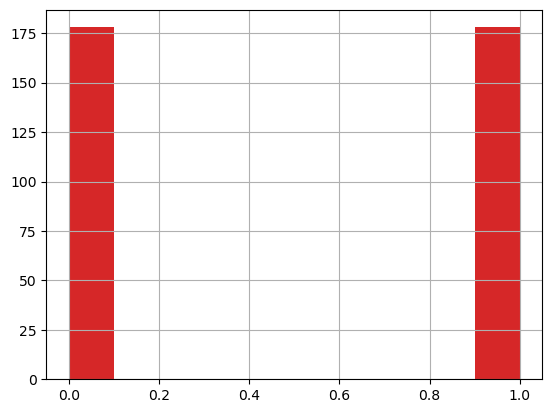

In [4]:
bands = [
    ('Delta', data.iloc[:, list(range(0,22))+[-1]]),
    ('Theta', data.iloc[:, list(range(0,3)) + list(range(22,41))+[-1]]),
    ('Alpha', data.iloc[:, list(range(0,3)) + list(range(41,60))+[-1]]),
    ('Beta', data.iloc[:, list(range(0,3)) + list(range(60,79))+[-1]]),
    ('HighBeta', data.iloc[:, list(range(0,3)) + list(range(79,98))+[-1]]),
    ('Gamma', data.iloc[:, list(range(0,3)) + list(range(98,117))+[-1]]),
    ('All', data.iloc[:, 0:118])
]
all_model_data = []

#bands = [delta, theta, alpha, beta, highbeta, gamma, allb]

for label, band in bands:
    # Data preprocessing
    print(f"\n{label} columns:\n", band.columns.tolist())
    X = band.drop('Class', axis=1)
    y = band['Class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, stratify=None)
    #using smote to oversample
    smote = SMOTE(random_state=0)
    X_train, y_train = smote.fit_resample(X, y)
    y_train.hist()
    pca = PCA(0.95)
    X_pca = pca.fit_transform(X)
    X_pca.shape
    X = X.dropna()
    X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.1, random_state=30)
    #using smote to oversample
    smote = SMOTE(random_state=0)
    X_train_pca, y_train = smote.fit_resample(X_pca, y)
    y_train.hist()
    svclassifier = SVC(kernel='linear',probability=True)
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    print('SVM accuracy:', svclassifier.score(X_test, y_test))
    print('SVM classification report:\n', classification_report(y_test, y_pred))
    y_scores = svclassifier.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    # Calculate AUC
    svm_auc = auc(fpr, tpr)
    print('SVM AUC value:', svm_auc)
    newsvm=SVC(kernel='linear', probability=True)
    newsvm.fit(X_train_pca, y_train)
    y_pred = newsvm.predict(X_test_pca)
    print('\nSVM accuracy for PCA:', newsvm.score(X_test_pca, y_test))
    print('SVM classification report for PCA:\n', classification_report(y_test, y_pred))
    y_scores = newsvm.predict_proba(X_test_pca)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    pcasvm_auc = auc(fpr, tpr)
    print('SVM AUC value for PCA:', pcasvm_auc)
    
    knn = KNeighborsClassifier(n_neighbors=10)
    knn.fit(X_train, y_train)
    print('KNN accuracy:', knn.score(X_test, y_test))
    y_pred = knn.predict(X_test)
    print('KNN classification report:\n',classification_report(y_test, y_pred))
    y_scores = knn.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    knn_auc = auc(fpr, tpr)
    print('KNN AUC value:', knn_auc)
    pknn = KNeighborsClassifier(n_neighbors=10)
    pknn.fit(X_train_pca, y_train)
    print('\nKNN accuracy for PCA:', pknn.score(X_test_pca, y_test))
    y_pred = pknn.predict(X_test_pca)
    print('KNN classification report for PCA\n', classification_report(y_test, y_pred))
    y_scores = pknn.predict_proba(X_test_pca)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    pcaknn_auc = auc(fpr, tpr)
    print('KNN AUC value for PCA',pcaknn_auc)
    
    model = RandomForestClassifier(n_estimators=40)
    model.fit(X_train, y_train)
    print('Random Forest accuracy:', model.score(X_test, y_test))
    y_pred = model.predict(X_test)
    print('Random Forest classification report\n',classification_report(y_test, y_pred))
    y_scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    rf_auc = auc(fpr, tpr)
    print('Random Forest AUC value:', rf_auc)
    pmodel = RandomForestClassifier(n_estimators=40)
    pmodel.fit(X_train_pca, y_train)
    print('\nRandom Forest accuracy for PCA:', pmodel.score(X_test_pca, y_test))
    y_pred = pmodel.predict(X_test_pca)
    print('Random Forest classification report for PCA:\n',classification_report(y_test, y_pred))
    y_scores = pmodel.predict_proba(X_test_pca)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    pcarf_auc = auc(fpr, tpr)
    print('Random Forest AUC value for PCA:', pcarf_auc)
    
    lg = LogisticRegression()
    lg.fit(X_train, y_train)
    print('Logistic Regression accuracy:', lg.score(X_test, y_test))
    y_pred = lg.predict(X_test)
    print('Logistic Regression classification report:\n',classification_report(y_test, y_pred))
    y_scores = lg.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    lg_auc = auc(fpr, tpr)
    print('Logistic Regression AUC value:',lg_auc)
    plg = LogisticRegression()
    plg.fit(X_train_pca, y_train)
    print('\nLogistic Regression accuracy for PCA:',plg.score(X_test_pca, y_test))
    y_pred = plg.predict(X_test_pca)
    print('Logistic Regression classification report for PCA:\n',classification_report(y_test, y_pred))
    y_scores = plg.predict_proba(X_test_pca)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    pcalg_auc = auc(fpr, tpr)
    print('Logistic Regression AUC value for PCA',pcalg_auc)
    
    clf = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=2)
    clf.fit(X_train, y_train, eval_set=[(X_test, y_test)])
    y_pred = clf.predict(X_test)
    print('XGB accuracy:',clf.score(X_test, y_test))
    print('XGB Classification report:\n',classification_report(y_test, y_pred))
    y_scores = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    xgb_auc = auc(fpr, tpr)
    print('XGB AUC value:',xgb_auc)
    pxgb = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=2)
    pxgb.fit(X_train_pca, y_train, eval_set=[(X_test_pca, y_test)])
    print('\nXGB accuracy for PCA:', pxgb.score(X_test_pca, y_test))
    y_pred = pxgb.predict(X_test_pca)
    print('XGB classification report for PCA:\n',classification_report(y_test, y_pred))
    y_scores = pxgb.predict_proba(X_test_pca)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    pxgb_auc = auc(fpr, tpr)
    print('XBG AUC for PCA:', pxgb_auc)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    model_row = [
        f"Trauma+AEI_{label}_PSD",
        svclassifier.score(X_test, y_test), svm_auc,
        knn.score(X_test, y_test), knn_auc,
        model.score(X_test, y_test), rf_auc,
        lg.score(X_test, y_test), lg_auc,
        clf.score(X_test, y_test), xgb_auc
    ]
    pca_row = [
        f"Trauma+AEI_{label}_PSDPCA", 
        newsvm.score(X_test_pca, y_test), pcasvm_auc,
        pknn.score(X_test_pca, y_test),pcaknn_auc,
        pmodel.score(X_test_pca, y_test),pcarf_auc,
        plg.score(X_test_pca, y_test),pcalg_auc,
        pxgb.score(X_test_pca, y_test), pxgb_auc
    ]
    all_model_data.append(model_row)
    all_model_data.append(pca_row)
    for row in all_model_data:
        print(row, type(row), len(row) if hasattr(row, '__len__') else 'Not iterable')
columns = ['Combination', 'SVM Accuracy', 'SVM AUC', 
           'KNN Accuracy', 'KNN AUC', 
           'Random Forest Accuracy','Random Forest AUC', 
           'Logistic Regression Accuracy', 'Logistic Regression AUC', 
           'XGB Accuracy', 'XGB AUC']
    
df = pd.DataFrame(all_model_data, columns=columns)
df.to_csv('masterdata.csv', mode='a',header=not os.path.exists('masterdata.csv'),index=False)